In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint
from pprint import pprint as pprint
import collections
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import pandas as pd

In [3]:
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [4]:
users = pd.read_sql_query('SELECT user1.user_name AS user, COUNT(*) as number_of_retweets, \
                            user2.user_name AS retwitter \
                            FROM user AS user1 \
                             JOIN tweet ON tweet.user_id = user1.user_id \
                             JOIN retweet ON retweet.source_tweet_id = tweet.tweet_id \
                             JOIN user AS user2 ON retweet.user_id = user2.user_id \
                             GROUP BY user, retwitter', engine)
print(users[:10])

                                     user  number_of_retweets  \
0                       "We the People" 🏁                   1   
1  #Bangladesh News 24 (#BreakingNews 24)                   1   
2  #Bangladesh News 24 (#BreakingNews 24)                   1   
3                #BobsTerLove #ArmyOfLove                   1   
4                       #Deplorable Sunny                   1   
5                       #Deplorable Sunny                   1   
6                       #Deplorable Sunny                   1   
7                       #Deplorable Sunny                   1   
8                       #Deplorable Sunny                   9   
9                       #Deplorable Sunny                   1   

                                retwitter  
0                       marlene silva ⭐⭐⭐  
1          Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸  
2                      The King Of Comedy  
3  Deplorable Canuck #MCGA #MAGA #Cdnpoli  
4                            B HAPPY&#kag  
5                   

In [5]:
G = nx.from_pandas_edgelist(users, 'user', 'retwitter', 'number_of_retweets')

In [6]:
# Get nodes with degree >= min_degree

min_degree = 100

nodes = [node for node, degree in G.degree() if degree >= min_degree]

In [7]:

# Create a subgraph with nodes degree >= min_degree (in the G graph)

G_sampled = G.subgraph(nodes)
pprint(nx.info(G_sampled))


('Name: \n'
 'Type: SubGraph\n'
 'Number of nodes: 92\n'
 'Number of edges: 476\n'
 'Average degree:  10.3478')


In [8]:
def get_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

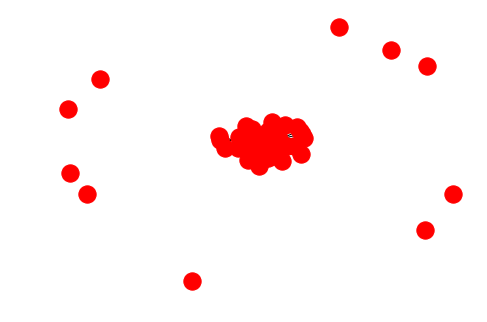

In [9]:
nx.draw(G_sampled, with_labels=False, edges=G_sampled.edges)
plt.show()

In [10]:
print("users", len(G_sampled.nodes))
print("connections",len(G_sampled.edges))

users 92
connections 476


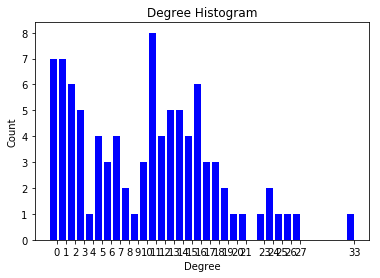

In [11]:
# avg_node_connectivity = nx.networkx.average_node_connectivity(G)
# print('Average node connectivity: ', avg_node_connectivity)

get_histogram(G_sampled)

In [12]:
from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G_sampled)

communities_sum = 0
communities_gn = []

for community_gn in next(communities_iter):
    communities_sum += 1
    communities_gn.append(community_gn)
    print("Community ", communities_sum)
    print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
{'Loomered❤️Molly⭐️⭐️⭐️', 'ＤａｒｋＧｒｅｙＧｈｏｓｔ🌹-K-', 'Terri Land', 'Gary', '⏳Ethan Allen⏳', '🇺🇸 Jayne Q. Nationalist ⭐️⭐️⭐️', 'ɳαɳ૮ყ ن💄#VOTERed', 'NJaikens 🇺🇸', 'Elaine', 'Trump_Chi17', 'Linda Suhler, PhD', 'GO RED STATE BY STATE', 'Adrian Norman', 'Patriot Gary', 'TheKat ❤️', 'Deplorable Dan 🇺🇸', 'South Fl Dragonphoenix69', 'American Patriot', 'Jennifer 🔱🇺🇸🔱🌟🌟🌟', 'DrLee MD is A NATIONALIST', 'Nationalist🇺🇸T🇺🇸', 'Haley Kennington', '@gary[WontBackDown]', 'Dorcas↩', 'Kat  #ISTANDWITHGENFLYNN', 'Cody', 'Nationalist Drew 🇺🇸🏁🍻', 'Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 'SeaneyB ♦️ ⭐⭐⭐', 'GRIZZ 🍺', 'Punchy DeNiro IsAnAzzhat👊🇺🇸🌟🌟🌟🕆🇺🇸❤🇮🇱 🚂', 'Sektor (K)', '🌟Patriotic Cindy🌟🚂🔴🐘🐘🇺🇸🇨🇱', '🇺🇸 Jason A. ❌', '🦅 🦅 Nationalist Eagle 🦅🦅', 'Matthew', '❌ Daniel John Sobieski ❌', 'Alisande 🇺🇸', 'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 'Sandpiper👑✝️✡️🐕🐈❤️', '🐘🇺🇸 Kim 🇺🇸🐘', '⭐️⭐️⭐️ @gsPatton007  🥊BEAT DEMS NOV 6🇺🇸', 'RW 😡', 'Laura Vote Red', '🇺🇸🔥Lady De’Plorable🔥🇺🇸', 'ℂ𝕙𝕣𝕚𝕤𝕥𝕚𝕟𝕖💋', 'Tim Donnelly for Congress', 'Bri

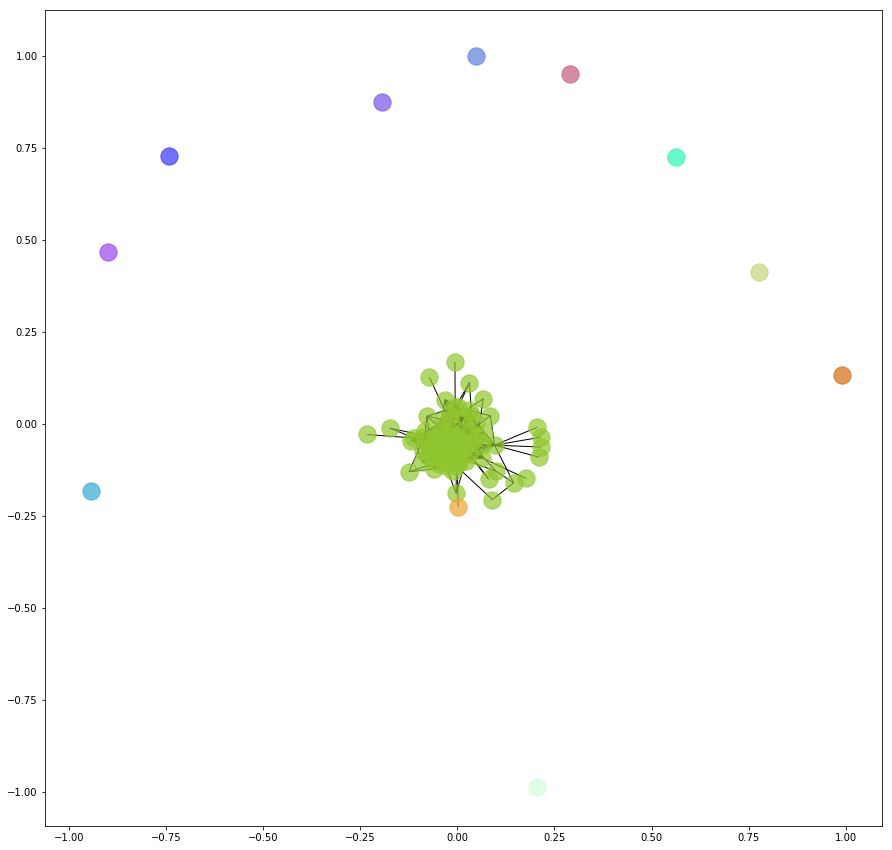

In [13]:
from matplotlib.pyplot import figure
import numpy

figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.show()

In [17]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
communities_gmc = greedy_modularity_communities(G_sampled)

communities_sum = 0

for community_gmc in communities_gmc:
    communities_sum += 1
    print("Community ", communities_sum)
    print(community_gmc)
    print("Liczność community: ", len(community_gmc), "\n")
    
print("Znaleziono communities: ", communities_sum)

ModuleNotFoundError: No module named 'networkx.algorithms.community.modularity_max'

In [15]:
figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for community in communities_gmc:
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.show()

NameError: name 'communities_gmc' is not defined

<Figure size 1080x1080 with 0 Axes>

In [18]:
sorted(G_sampled.degree, key=lambda x: x[1], reverse=True)[:10]


[('Patriot Gary', 33),
 ('@gary[WontBackDown]', 27),
 ('Sektor (K)', 26),
 ('Cindyseestruth', 25),
 ('Kat  #ISTANDWITHGENFLYNN', 24),
 ('GRIZZ 🍺', 24),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 23),
 ('Chris  🇺🇸 Let Freedom Ring', 21),
 ('Laura Vote Red', 20),
 ('Cody', 19)]

In [19]:
degree_centrality = sorted(nx.degree_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [20]:
degree_centrality[:10]

[('Patriot Gary', 0.3626373626373627),
 ('@gary[WontBackDown]', 0.2967032967032967),
 ('Sektor (K)', 0.28571428571428575),
 ('Cindyseestruth', 0.27472527472527475),
 ('Kat  #ISTANDWITHGENFLYNN', 0.26373626373626374),
 ('GRIZZ 🍺', 0.26373626373626374),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 0.2527472527472528),
 ('Chris  🇺🇸 Let Freedom Ring', 0.23076923076923078),
 ('Laura Vote Red', 0.2197802197802198),
 ('Cody', 0.2087912087912088)]

In [21]:
betweenness_centrality = sorted(nx.betweenness_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [22]:
betweenness_centrality[:10]

[('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 0.09826291458958286),
 ('Patriot Gary', 0.06585512229398106),
 ('Laura Vote Red', 0.0532248285775342),
 ('Cindyseestruth', 0.04980446463619948),
 ('@gary[WontBackDown]', 0.045242898544778115),
 ('Cody', 0.04134561508448342),
 ('Sektor (K)', 0.04128601715215801),
 ('pyrrhophytes ❌', 0.03501034755316197),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 0.034687428768677704),
 ('Kat  #ISTANDWITHGENFLYNN', 0.03263647688474192)]

In [23]:
edge_betweenness_centrality = sorted(nx.edge_betweenness_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [24]:
edge_betweenness_centrality[:10]

[(('🇺🇸 Jayne Q. Nationalist ⭐️⭐️⭐️', 'Adrian Norman'), 0.019350215002388916),
 (('Elaine', 'GITMO 🇺🇸'), 0.019350215002388916),
 (('Patriot Gary', 'John~💋Kiss My Bot'), 0.019350215002388916),
 (('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 'Katrina Pierson'), 0.019350215002388916),
 (('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 'Marsha Blackburn'),
  0.019350215002388916),
 (('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 'Wayne Dupree 🎧'), 0.019350215002388916),
 (('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', '❌ Daniel John Sobieski ❌'),
  0.019350215002388916),
 (('Laura Vote Red', 'Matt Couch 🎙'), 0.019350215002388916),
 (('Brigitte Gabriel', 'pyrrhophytes ❌'), 0.019350215002388916),
 (('Cody', 'Str8 Don Lemon🍋👫🍺🌈❤'), 0.018689050558125416)]

In [25]:
from networkx.algorithms.community import k_clique_communities
cliques = list(k_clique_communities(G_sampled, 6))

In [26]:
for clique in cliques:
    print(len(clique))
    print(clique)

13
frozenset({'Anna❤Trump Nationalist🇺🇸🇮🇹', 'Dorcas↩', 'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', '🐘🇺🇸 Kim 🇺🇸🐘', 'Kat  #ISTANDWITHGENFLYNN', 'Cody', 'Patriot Gary', '🇺🇸🔥Lady De’Plorable🔥🇺🇸', 'GRIZZ 🍺', 'Chris  🇺🇸 Let Freedom Ring', 'Sektor (K)', '🌟Patriotic Cindy🌟🚂🔴🐘🐘🇺🇸🇨🇱', 'Robin 🇺🇸❤️🇺🇸'})
7
frozenset({'🇺🇸🔥Lady De’Plorable🔥🇺🇸', '@gary[WontBackDown]', 'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 'Chris  🇺🇸 Let Freedom Ring', 'Sektor (K)', 'Nationalist🇺🇸T🇺🇸', 'Patriot Gary'})
6
frozenset({'🇺🇸🔥Lady De’Plorable🔥🇺🇸', 'Kat  #ISTANDWITHGENFLYNN', 'Jennifer 🔱🇺🇸🔱🌟🌟🌟', 'TheKat ❤️', 'Arch Kennedy', '🐘🇺🇸 Kim 🇺🇸🐘'})
6
frozenset({'⏳Ethan Allen⏳', 'ＤａｒｋＧｒｅｙＧｈｏｓｔ🌹-K-', '⭐️⭐️⭐️ @gsPatton007  🥊BEAT DEMS NOV 6🇺🇸', '🇺🇸Nationalist Lori🇺🇸 #WWG1WGA', 'RW 😡', 'Patriot Gary'})
6
frozenset({'Chris  🇺🇸 Let Freedom Ring', '@gary[WontBackDown]', 'RW 😡', 'Matthew', 'Nationalist🇺🇸T🇺🇸', 'Patriot Gary'})


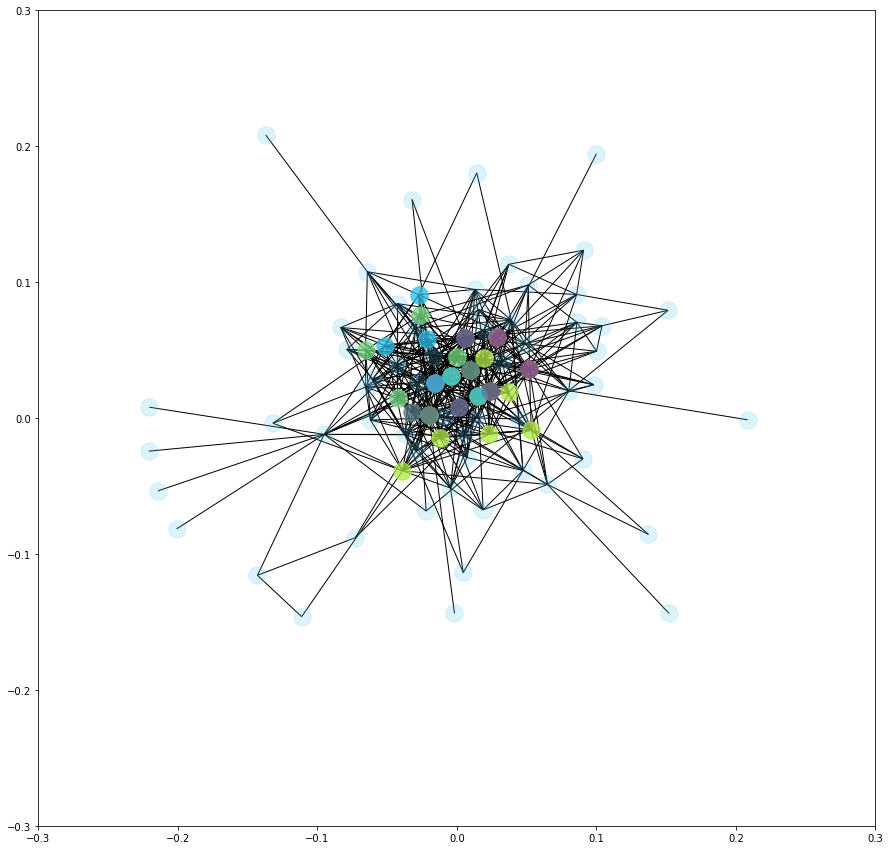

In [27]:
figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for clique in cliques:
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=clique,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=G_sampled.nodes,
                           node_color=numpy.random.rand(3,),
                           alpha=0.2)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)

plt.show()

In [28]:
# active users in distinct cliques

distinct_users_in_cliques = {}

for clique in cliques:
    for user in clique:
        if user in distinct_users_in_cliques:
            distinct_users_in_cliques[user] += 1
        else:
            distinct_users_in_cliques[user] = 1

In [29]:
top_users_in_cliques = sorted(distinct_users_in_cliques.items(), key=lambda x : x[1], reverse=True)
top_users_in_cliques[:5]

[('Patriot Gary', 4),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 3),
 ('Chris  🇺🇸 Let Freedom Ring', 3),
 ('ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 2),
 ('🐘🇺🇸 Kim 🇺🇸🐘', 2)]

In [64]:
### Get Vader for this users
user = top_users_in_cliques[10]
users = pd.read_sql_query('SELECT user.user_id AS id, user.user_name, tweet.tweet_id, vader.compound as vader_mood \
                            FROM user \
                             JOIN tweet ON tweet.user_id = user.user_id \
                             JOIN vader ON tweet.tweet_id = vader.id \
                             WHERE user.user_name = "' + user[0] + '"', engine)
users

,id,user_name,tweet_id,vader_mood
0,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056157133585240064,0.6249
1,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056167131937730560,0.6249
2,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056168149136166912,0.3367
3,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056168852302807040,0.0000
4,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056170675503841280,0.4574
5,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056178970771763200,0.7650
6,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056180593598308352,0.8481
7,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056406304347119616,0.6249
8,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056535786588381184,0.0000
9,734168909553766405,Anna❤Trump Nationalist🇺🇸🇮🇹,1056888784636260352,-0.6808
